In [1]:
import pandas as pd
df = pd.read_csv('clean.txt')
print(df.shape)
df.head()

(9693, 14)


,player,quint,home,team,opp,net%,netatt,ny,ny/a,car,ry,ypc,tds,tos
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091,1,2,2.000000,0,1
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545,3,22,7.333333,2,1
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488,2,5,2.500000,3,4
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405,4,7,1.750000,1,1
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778,2,4,2.000000,0,3


In [3]:
df['touches'] = df['netatt'] + df['car']
df.head()

,player,quint,home,team,opp,net%,netatt,ny,ny/a,car,ry,ypc,tds,tos,touches
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091,1,2,2.000000,0,1,12.0
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545,3,22,7.333333,2,1,47.0
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488,2,5,2.500000,3,4,45.0
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405,4,7,1.750000,1,1,41.0
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778,2,4,2.000000,0,3,29.0


In [4]:
df.isnull().sum()

player        0
quint         0
home          0
team          0
opp           0
net%        306
netatt        0
ny            0
ny/a        306
car           0
ry            0
ypc        1758
tds           0
tos           0
touches       0
dtype: int64

In [5]:
# exclude postseason
ispost = ((df['quint'] + 1) % 5) == 0
dfreg = df[~ispost]
print(dfreg.shape)
dfreg.head()

(9333, 15)


,player,quint,home,team,opp,net%,netatt,ny,ny/a,car,ry,ypc,tds,tos,touches
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091,1,2,2.000000,0,1,12.0
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545,3,22,7.333333,2,1,47.0
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488,2,5,2.500000,3,4,45.0
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405,4,7,1.750000,1,1,41.0
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778,2,4,2.000000,0,3,29.0


In [6]:
# determine year
dfreg['year'] = df['quint'] // 5 + 2004
dfreg.head()

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player,quint,home,team,opp,net%,netatt,ny,ny/a,car,ry,ypc,tds,tos,touches,year
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091,1,2,2.000000,0,1,12.0,2013
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545,3,22,7.333333,2,1,47.0,2013
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488,2,5,2.500000,3,4,45.0,2013
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405,4,7,1.750000,1,1,41.0,2013
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778,2,4,2.000000,0,3,29.0,2013


In [7]:
dfreg['to:touch'] = dfreg['tos'] / dfreg['touches']
dfreg.head()

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,player,quint,home,team,opp,net%,netatt,ny,ny/a,car,ry,ypc,tds,tos,touches,year,to:touch
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091,1,2,2.000000,0,1,12.0,2013,0.083333
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545,3,22,7.333333,2,1,47.0,2013,0.021277
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488,2,5,2.500000,3,4,45.0,2013,0.088889
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405,4,7,1.750000,1,1,41.0,2013,0.024390
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778,2,4,2.000000,0,3,29.0,2013,0.103448


In [8]:
avgs = dfreg.groupby('year')['to:touch'].mean()
avgs

year
2004    0.027024
2005    0.028613
2006    0.026055
2007    0.030162
2008    0.046264
2009    0.044926
2010    0.043999
2011    0.041874
2012    0.041754
2013    0.037881
2014    0.038090
2015    0.033314
2016    0.036484
2017    0.036240
2018    0.035716
2019    0.036068
Name: to:touch, dtype: float64

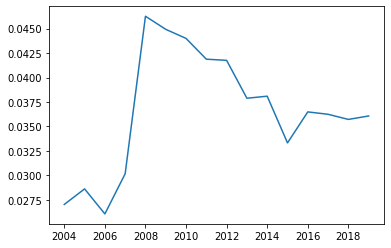

None

In [10]:
import matplotlib.pyplot as plt
x = sorted(dfreg['year'])
y = [avgs[_] for _ in x]
plt.plot(x, y)
display(plt.show())

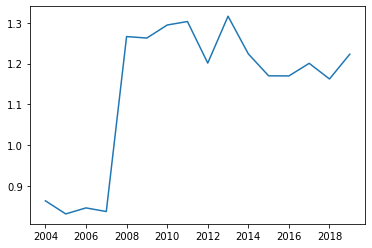

In [11]:
avgs = dfreg.groupby('year')['tos'].mean()
y = [avgs[_] for _ in x]
plt.plot(x, y)
plt.show()